# Dataset Problems
The dataset that will be used contains the usage behavior of around 9000 credit card users for the last six months. It is required to group credit card customers into several groups according to customer behavior to get an effective and efficient credit card marketing strategy.

# **Data Preprocessing**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering

In [ ]:
#os.chdir(r'D:\AI\SHAI_CLUP\Level_2\Project_1_clustering')

In [ ]:
# Load dataset
df = pd.read_csv("/content/CC GENERAL.csv")

# Display dimensions of dataframe
print(df.shape)
print(df.info())


(8950, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  


In [ ]:
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


**About Dataset**
This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

1. **CUST_ID** : Identification of Credit Card holder (Categorical).
2. **BALANCE** : Balance amount left in their account to make purchases (
3. **BALANCE_FREQUENCY** : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. **PURCHASES** : Amount of purchases made from account
5. **ONEOFF_PURCHASES** : Maximum purchase amount done in one-go
6. **INSTALLMENTS_PURCHASES** : Amount of purchase done in installment
7. **CASH_ADVANCE** : Cash in advance given by the user
8. **PURCHASES_FREQUENCY** : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
10. **ONEOFFPURCHASESFREQUENCY** : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
11. **PURCHASESINSTALLMENTSFREQUENCY** : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
12. **CASHADVANCEFREQUENCY** : How frequently the cash in advance being paid
13. **CASHADVANCETRX** : Number of Transactions made with "Cash in Advanced"
14. **PURCHASES_TRX** : Numbe of purchase transactions made
15. **CREDIT_LIMIT** : Limit of Credit Card for user
16. **PAYMENTS** : Amount of Payment done by user
17. **MINIMUM_PAYMENTS** : Minimum amount of payments made by user
18. **PRCFULLPAYMENT** : Percent of full payment paid by user
19. **TENURE** : Tenure of credit card service for user

In [ ]:
# Remove the first column : 'CUST_ID'
df.drop(df.columns[[0]], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [ ]:
# Display statistics for numeric columns
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
# Dropping the duplicate rows
duplicate_rows = df[df.duplicated()]
print("number of duplicate rows : ",duplicate_rows.shape)



number of duplicate rows :  (0, 17)


In [ ]:
# Drop duplicate row
df.drop_duplicates(inplace=True)

SUM : 
 BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


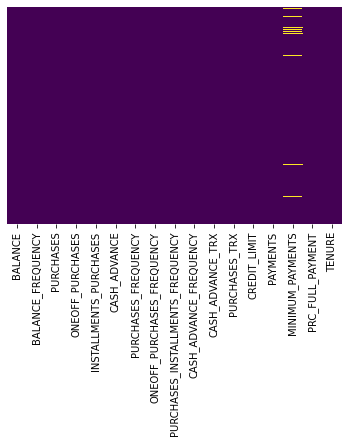

In [ ]:
# To check missing values
print("SUM : \n",df.isnull().sum())
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap="viridis")


In [ ]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [ ]:
# numeric columns
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean())

df["CREDIT_LIMIT"] = df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].interpolate())

print("SUM : \n",df.isnull().sum())


SUM : 
 BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


<function matplotlib.pyplot.show(*args, **kw)>

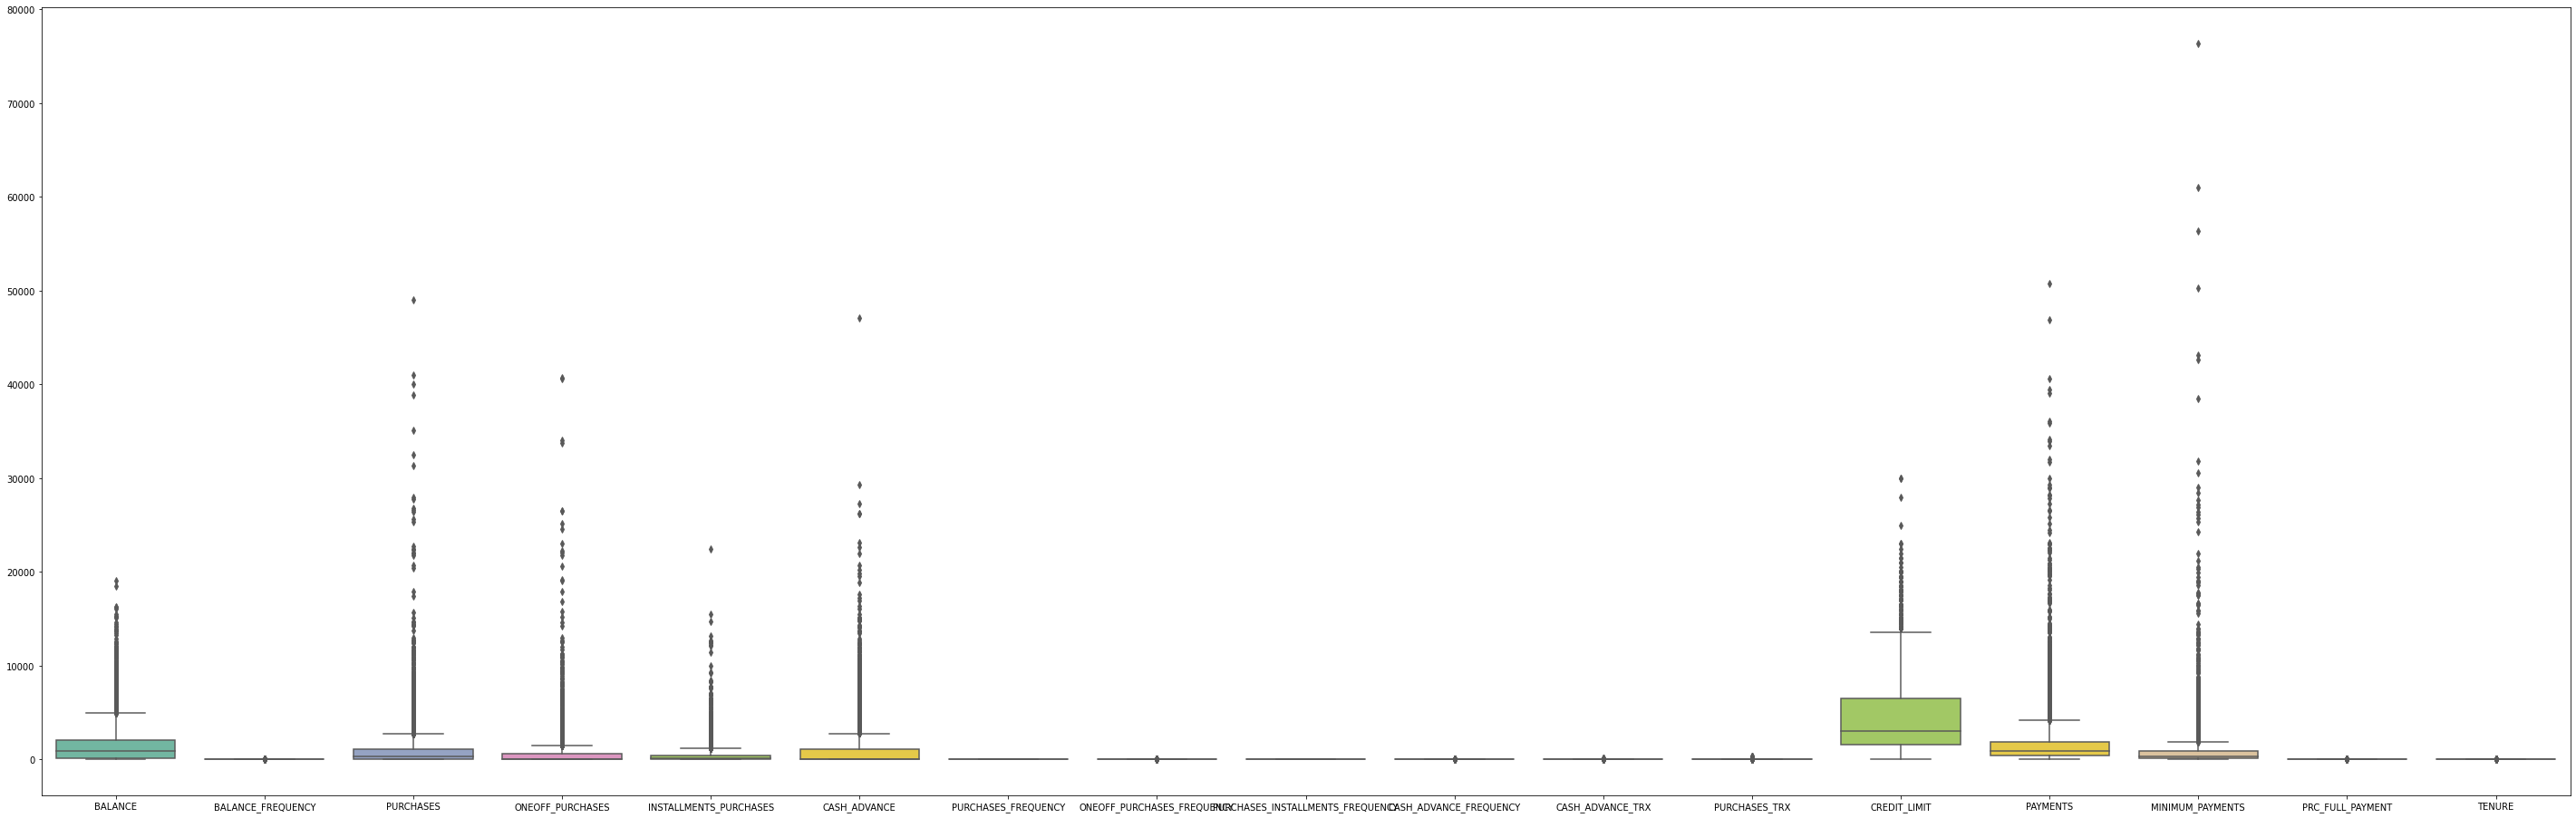

In [ ]:
# Handling Outlier
fig, ax = plt.subplots(figsize=(50,16)) 
sns.boxplot(data=df, orient="v", palette="Set2")
plt.show


**we see that we have 8 columns in our data contain outliers.**
**we will deal with it.**

In [ ]:
# Remove Outlier

def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    print("Q1 = ", Q1, " Q3 = ", Q3, " IQR = ", IQR)
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

# Extract all column names as list in Pandas Dataframe
lst_all_cols = df.columns.tolist()
print("lst_all_cols : \n",lst_all_cols)

print("\n")
# Numerical data distribution
print(list(set(df.dtypes.tolist())))
df_num = df.select_dtypes(include = ["float64", "int64"])
lst_num_cols = df_num.columns.tolist()
print("Numerical Data : \n",lst_num_cols)
print("\n")


indx = 0
for col in lst_num_cols:
    print(indx)
    lower_range, upper_range =  remove_outlier(df[col])
    df[col] = np.where(df[col] < lower_range, lower_range, df[col]) 
    df[col] = np.where(df[col] > upper_range, upper_range, df[col])
    indx = indx +1
    print("-----------------------------")


lst_all_cols : 
 ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


[dtype('int64'), dtype('float64')]
Numerical Data : 
 ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


0
Q1 =  128.2819155  Q3 =  2054.1400355  IQR =  1925.85812
-----------------------------
1
Q1 =  0.888889  Q3 =  1.0  IQR =  0.11111099999999996
-----------------------------
2
Q1 =  39.635  Q3 =  1110.13  IQR =  1070.4950000000001
-----------------

<function matplotlib.pyplot.show(*args, **kw)>

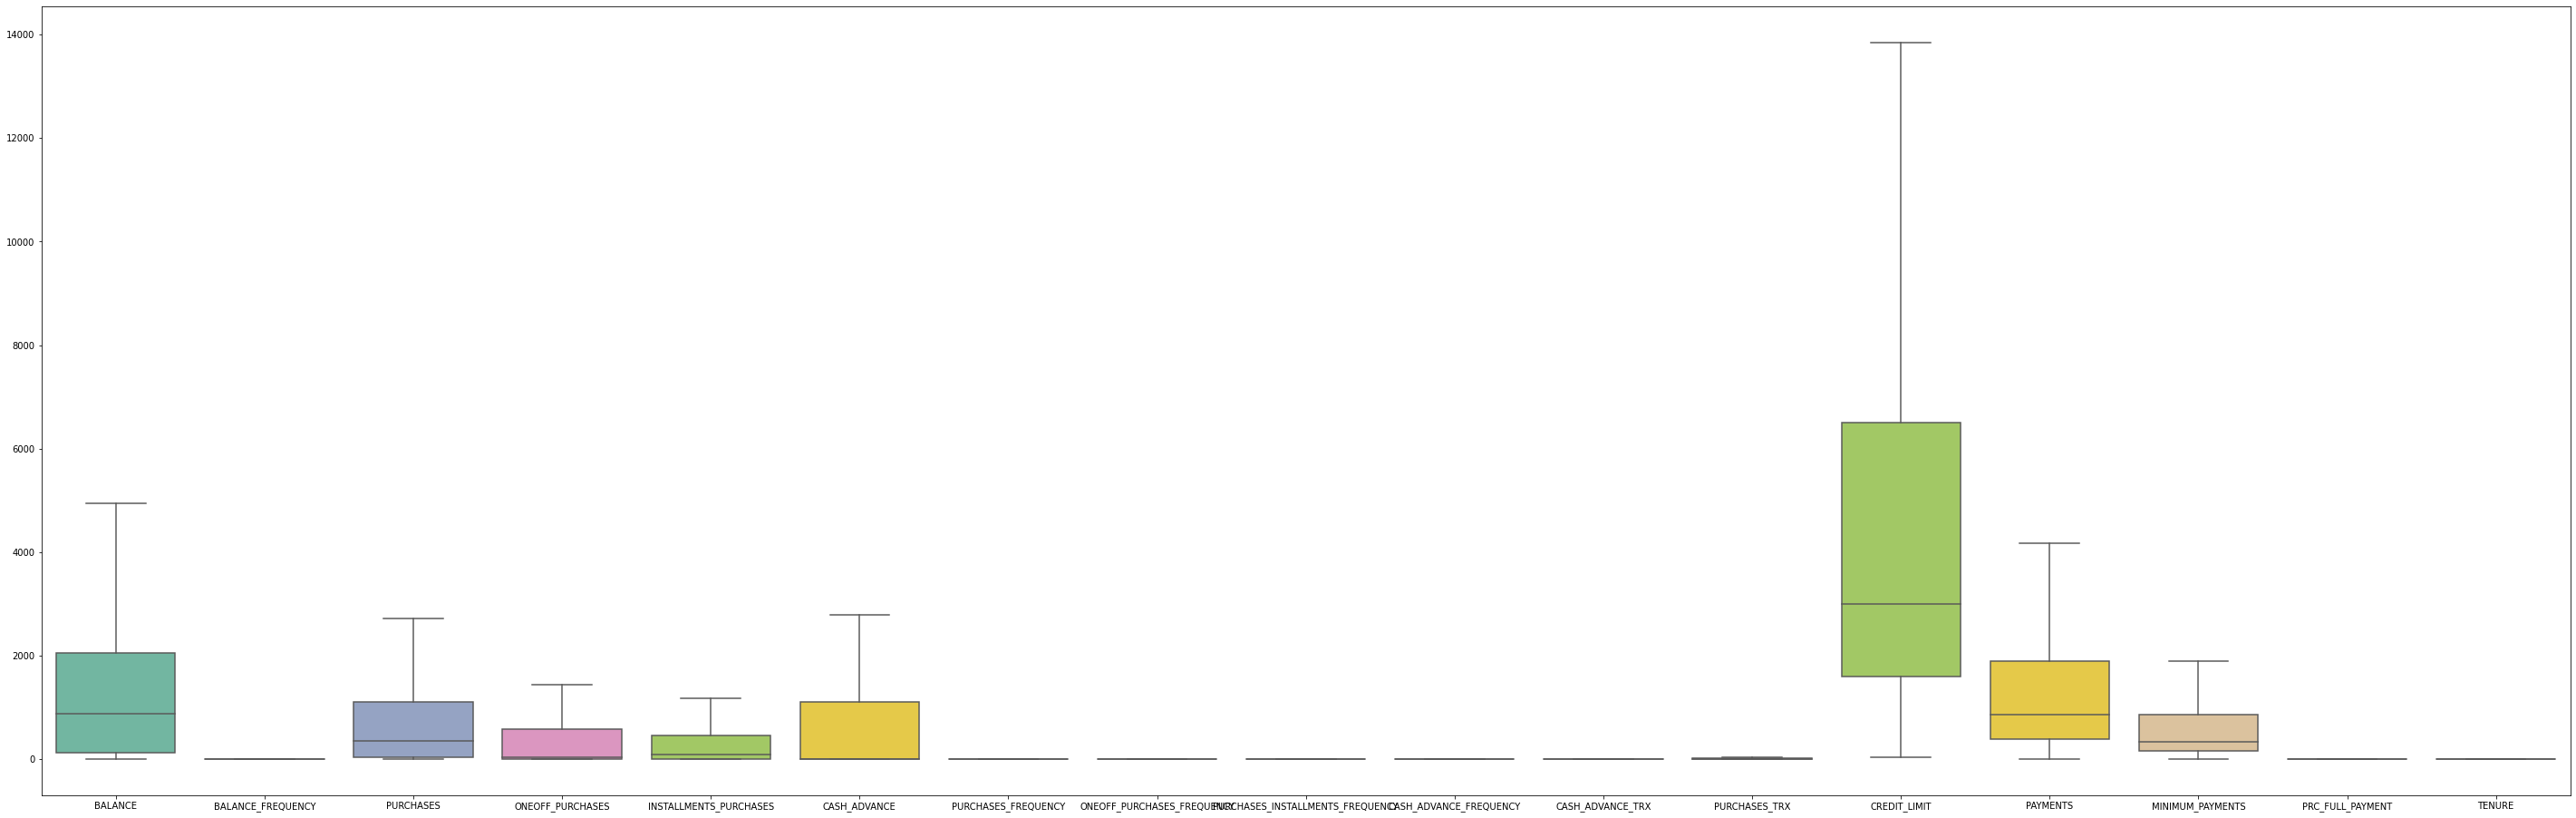

In [ ]:
# Handling Outlier
fig, ax = plt.subplots(figsize=(50,16)) 
sns.boxplot(data=df, orient="v", palette="Set2")
plt.show


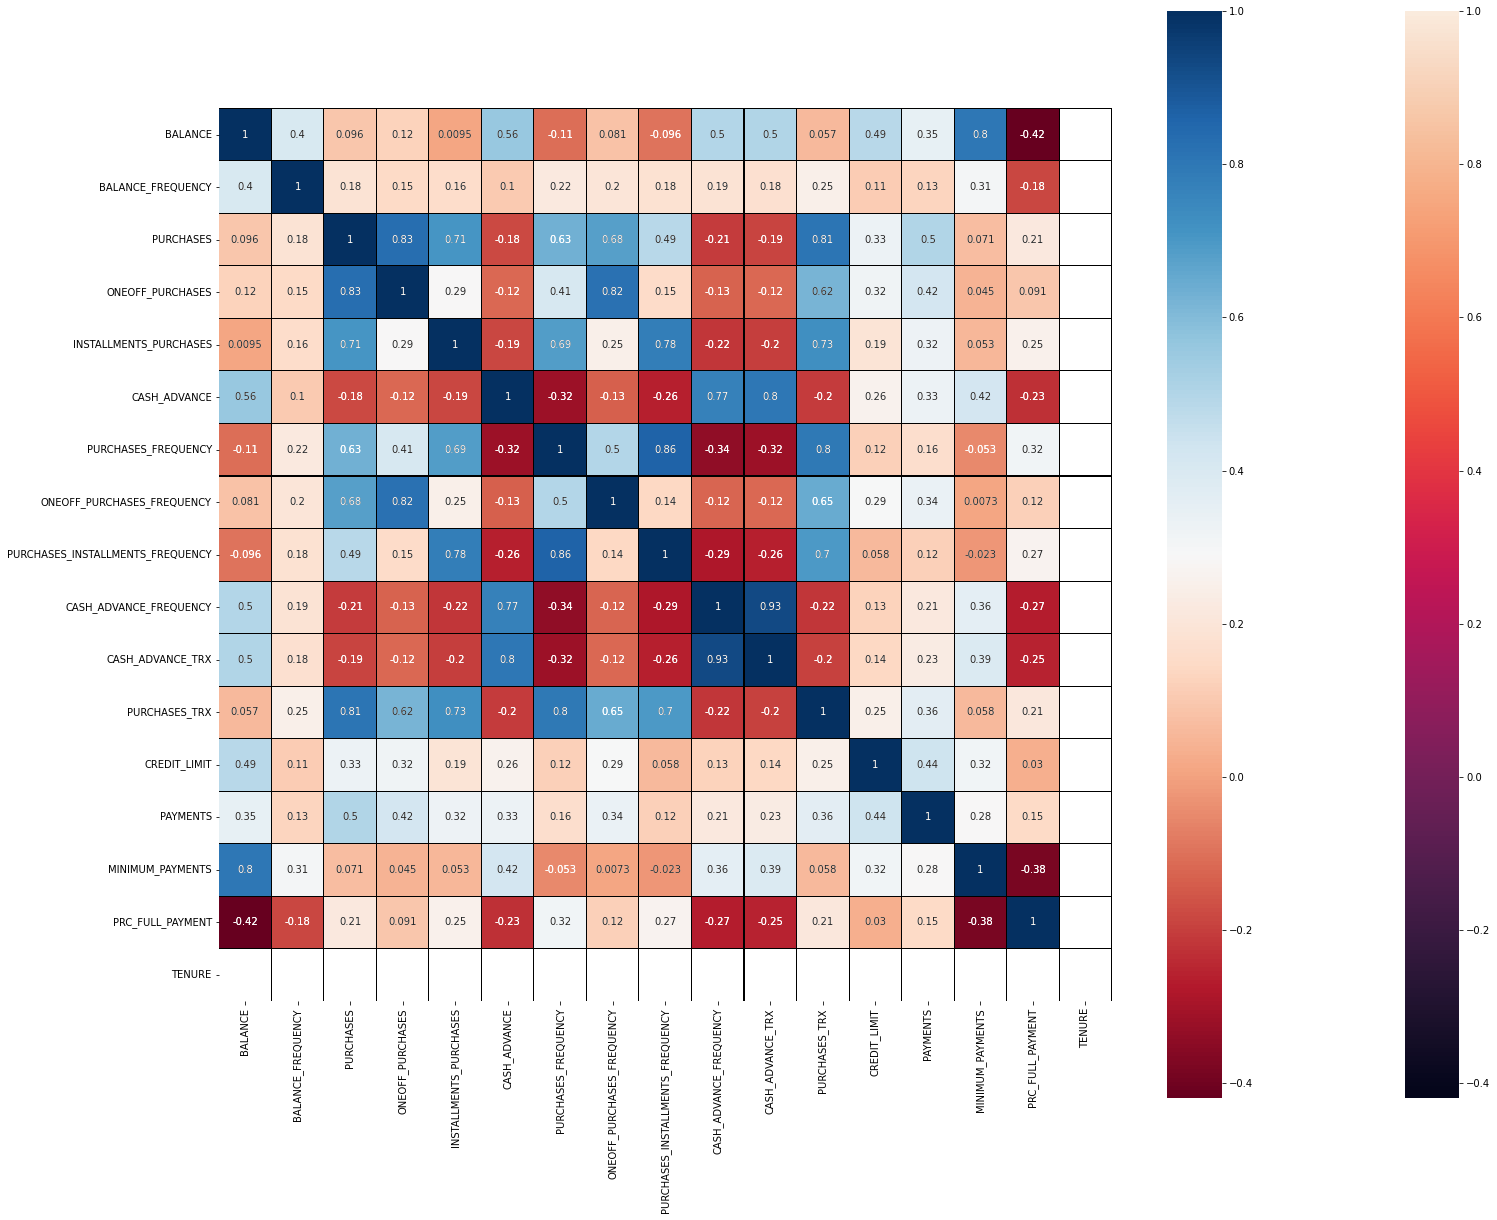

In [ ]:
# Selecting Relevant Features
corrMatrix_1 = df.corr()

fig, ax = plt.subplots(figsize=(25,20)) 
sns.heatmap(corrMatrix_1, annot=True)
sns.heatmap(corrMatrix_1, annot=True, linewidth=0.01, square=True, cmap="RdBu", linecolor="black")


# fig, ax = plt.subplots(figsize = (12, 9), dpi = 100)
# sns.heatmap(corrMatrix_1, center = 1, cbar = True, annot = True, linewidths = 0.5, ax = ax)
# plt.show()



In [ ]:
# Scaling
X = pd.DataFrame(StandardScaler().fit_transform(df))

###### PCA
Principal component analysis (PCA) is a method used in unsupervised machine learning (such as clustering) that reduces high-dimension data to smaller dimensions while preserving as much information as possible. By using PCA before applying clustering algorithm, it allows to reduces dimensions, data noise, and decrease computation cost. In this notebook, the number of features will be reduced to 2 dimensions so that the clustering results can be visualized.

In [ ]:
X = np.asarray(X)

pca = PCA(n_components=2, random_state=24)
X = pca.fit_transform(X)

# **Modeling**

#### K-Means algorithm

**Based on the results of the elbow method and Calinski Harabasz score above, it can be concluded that the best clustering number for the K-Means algorithm is 4 clusters. The following steps will apply the number of optimal clusters, visualize clusters distribution plot, and silhouette plots to evaluate their performance.**

In [ ]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN, Birch, MeanShift, AffinityPropagation
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn import metrics

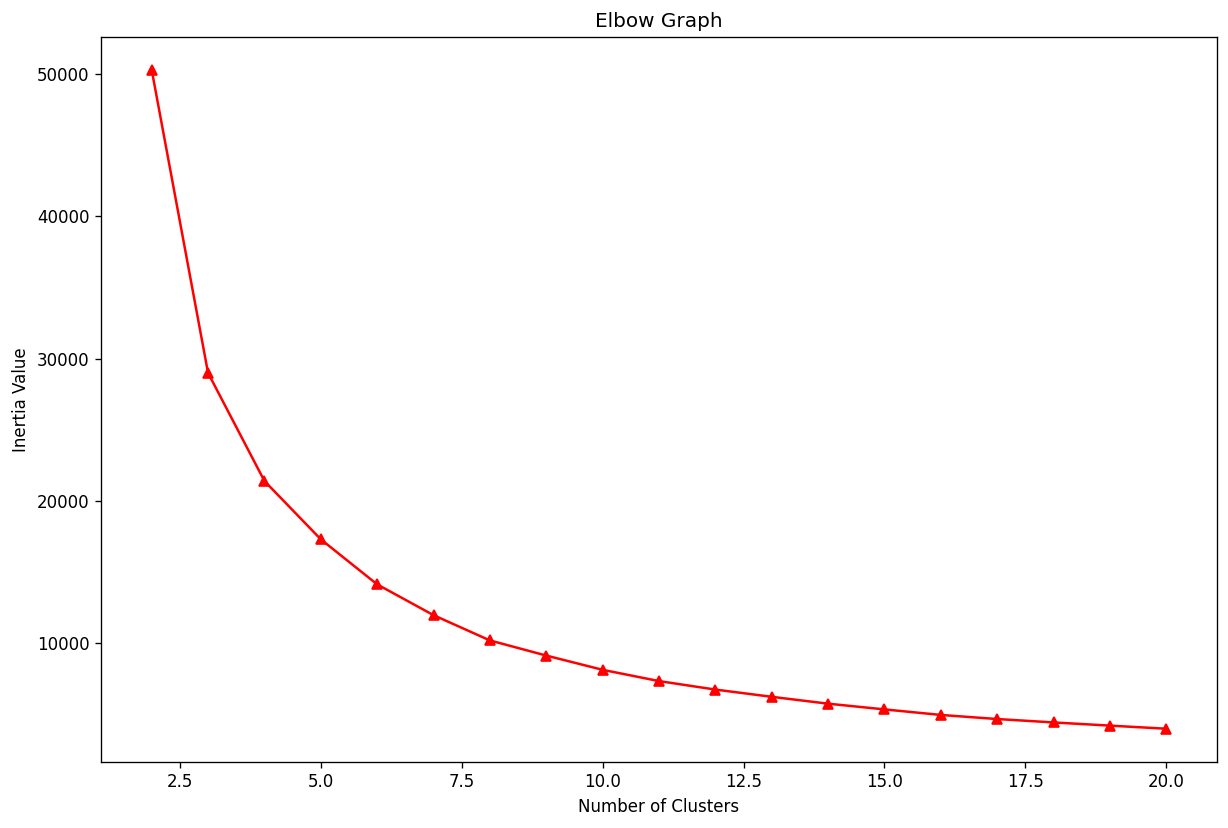

In [ ]:
kmeans_constants = {'n_init' : 100, 'random_state' : 1}
inertia_values = []

for k in range(2, 21):
#     scaler = StandardScaler()
#     X = scaler.fit_transform(df)
    model = KMeans(n_clusters = k, **kmeans_constants)
    model.fit(X)
    inertia_values.append(model.inertia_)

plt.figure(figsize = (12, 8), dpi = 120)
plt.plot(range(2, 21), inertia_values, color = 'r', marker = '^')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Value')
plt.title('Elbow Graph')
plt.show()

In [ ]:
kl = KneeLocator(range(2, 21), inertia_values, curve = 'convex', direction = 'decreasing')
kl.elbow

6

Elbow graph shows that **6 clusters** is the best choice for this dataset.

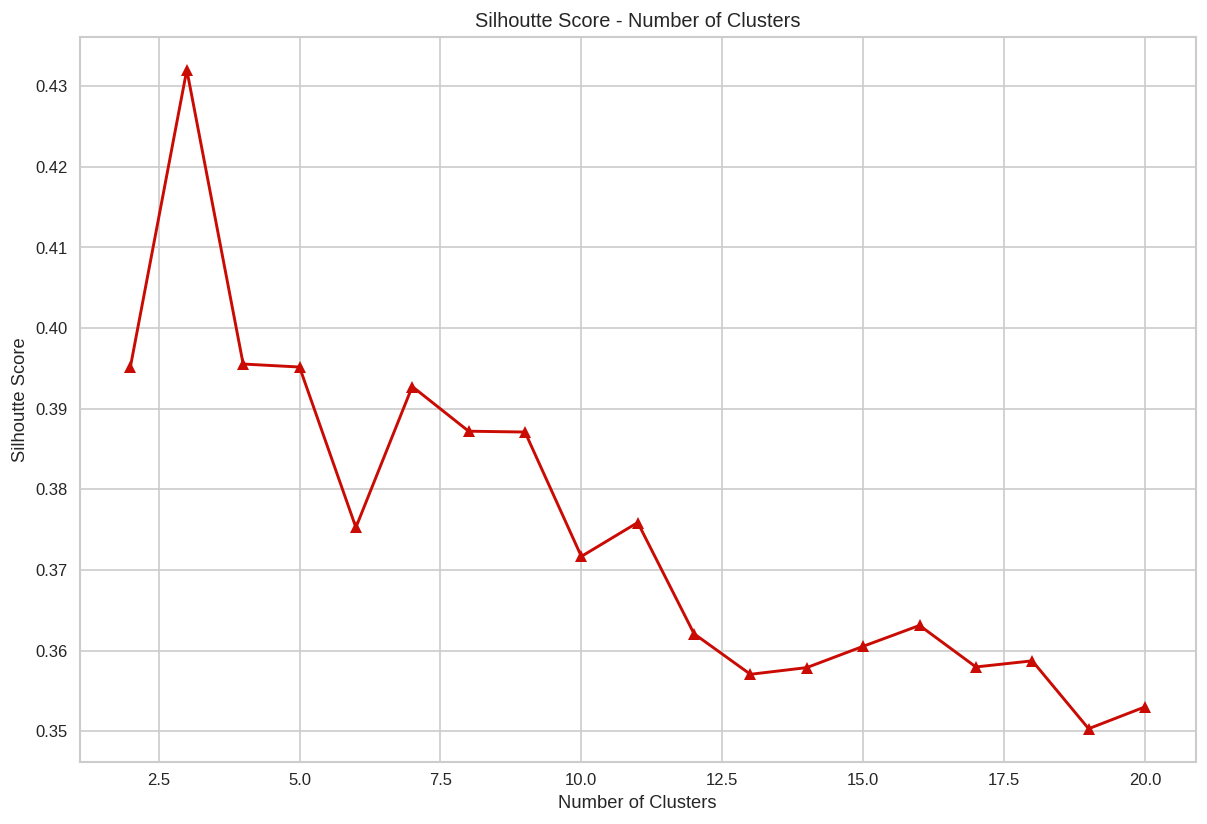

In [ ]:
silhoutte_coefs = []

for k in range(2, 21):
#     scaler = StandardScaler()
#     X = scaler.fit_transform(df)
    model = KMeans(n_clusters = k, **kmeans_constants)
    model.fit(X)
    silhoutte_coefs.append(metrics.silhouette_score(X, model.labels_))

plt.figure(figsize = (12, 8), dpi = 120)
plt.plot(range(2, 21), silhoutte_coefs, color = 'r', marker = '^')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhoutte Score')
plt.title('Silhoutte Score - Number of Clusters')
plt.show()

Based on the silhouette scores, **3 or 4 clusters** is the best choice. Considering that silhouette score is a better indicator than elbow graph, we will continue with **3 or 4 clusters.**

In [ ]:
!pip3 install yellowbrick

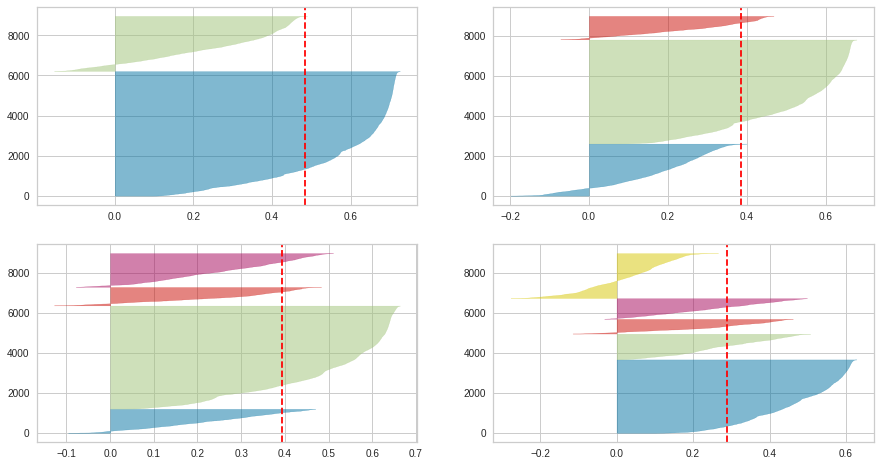

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df)

**we see that 4 cluster is the best k for our data**

In [ ]:
model = KMeans(n_clusters=4, random_state=1)
model.fit(X)

KMeans(n_clusters=4, random_state=1)

In [ ]:
y = model.predict(X)

In [ ]:
df['Cluster'] = y

In [ ]:
df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.4000,0.0000,95.40000,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,1
1,3202.467416,0.909091,0.0000,0.0000,0.00000,2784.552848,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,2
2,2495.148862,1.000000,773.1700,773.1700,0.00000,0.000000,1.000000,0.750000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,0
3,1666.670542,0.722223,1499.0000,1443.5125,0.00000,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,864.206542,0.000000,12.0,1
4,817.714335,1.000000,16.0000,16.0000,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,1
5,1809.828751,1.000000,1333.2800,0.0000,1171.59375,0.000000,0.666667,0.000000,0.583333,0.000000,0.0,8.0,1800.0,1400.057770,1904.229874,0.000000,12.0,0
6,627.260806,1.000000,2715.8725,1443.5125,688.38000,0.000000,1.000000,0.750000,1.000000,0.000000,0.0,41.0,13500.0,4177.921543,198.065894,0.357143,12.0,3
7,1823.652743,1.000000,436.2000,0.0000,436.20000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,12.0,2300.0,679.065082,532.033990,0.000000,12.0,0
8,1014.926473,1.000000,861.4900,661.4900,200.00000,0.000000,0.333333,0.083333,0.250000,0.000000,0.0,5.0,7000.0,688.278568,311.963409,0.000000,12.0,0
9,152.225975,0.722223,1281.6000,1281.6000,0.00000,0.000000,0.166667,0.166667,0.000000,0.000000,0.0,3.0,11000.0,1164.770591,100.302262,0.000000,12.0,0


 Silhouette SCore

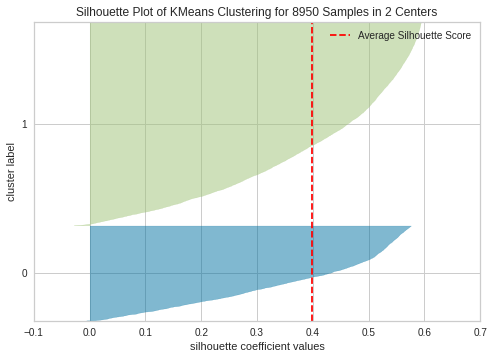

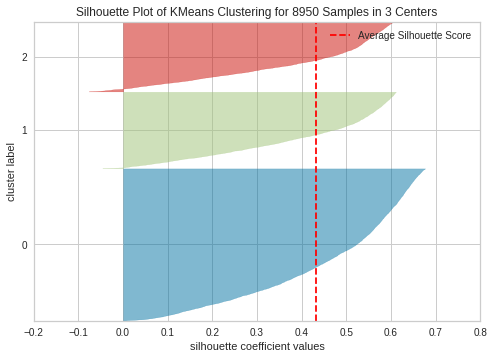

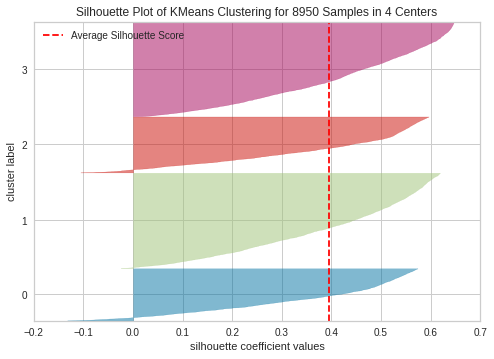

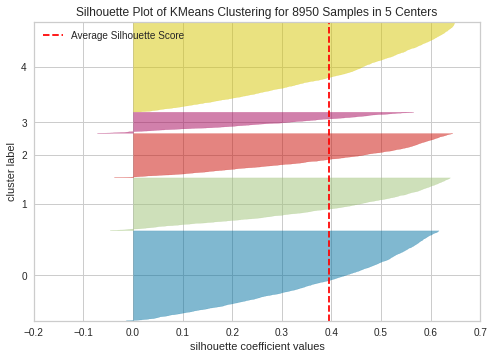

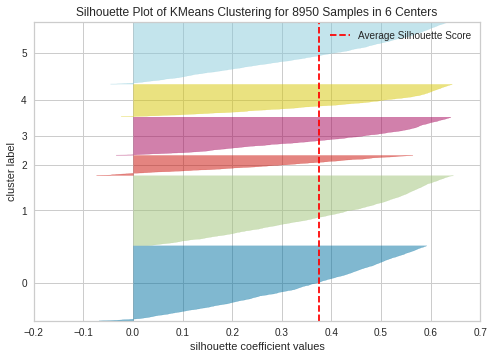

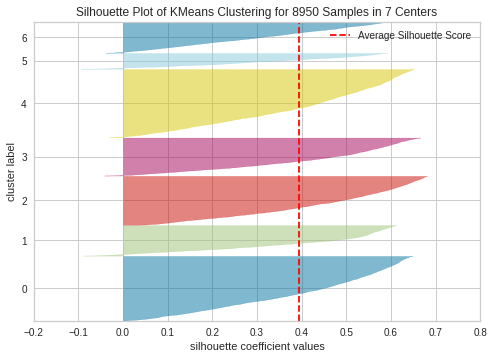

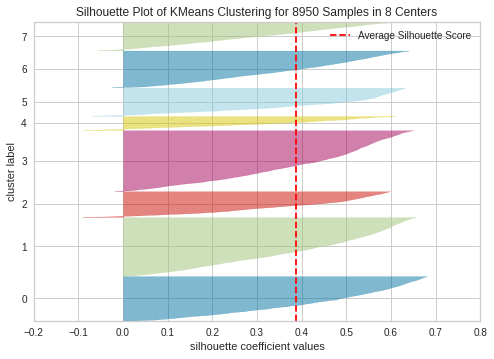

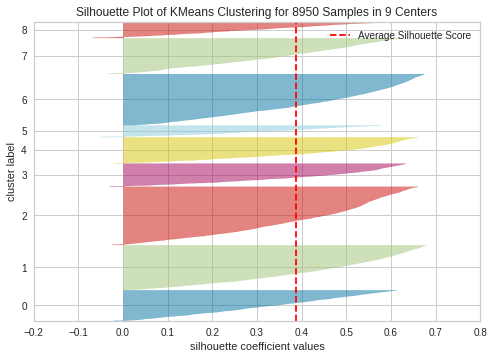

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
# Instantiate the clustering model and visualizer
for i in range (2,10):
  model = KMeans(i, random_state=42)
  visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

  visualizer.fit(X)        # Fit the data to the visualizer
  visualizer.poof()

##Cluster Kmean with PCA 

Text(0, 0.5, 'PC2')

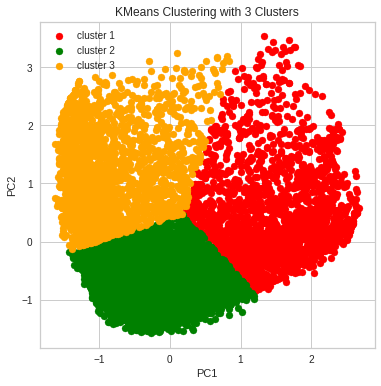

In [ ]:
data_p = pd.DataFrame(PCA(n_components = 2,whiten=True).fit_transform(X))
preds = pd.Series(KMeans(n_clusters =3).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

fig = plt.figure(figsize = (6, 6))
colors = ['red', 'green','orange']
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.legend()
plt.title('KMeans Clustering with 3 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

Agglomerative Hierarchical Clustering with PCA

Text(0, 0.5, 'PC2')

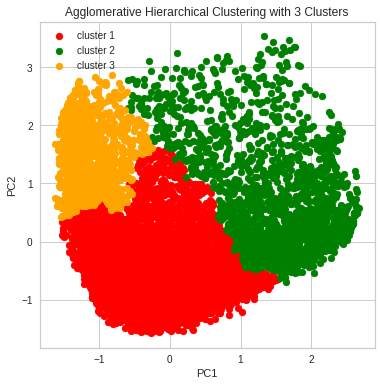

In [ ]:
data_p = pd.DataFrame(PCA(n_components = 2,whiten=True).fit_transform(X))
preds = pd.Series(AgglomerativeClustering(n_clusters =3).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

fig = plt.figure(figsize = (6, 6))
colors = ['red', 'green', 'orange']
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.legend()
plt.title('Agglomerative Hierarchical Clustering with 3 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

DBSCAN cluster

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=900)
data_p = pd.DataFrame(PCA(n_components = 2,whiten=True).fit_transform(X))
preds = pd.Series(dbscan.fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = ['principal component 1', 'principal component 2','cluster']

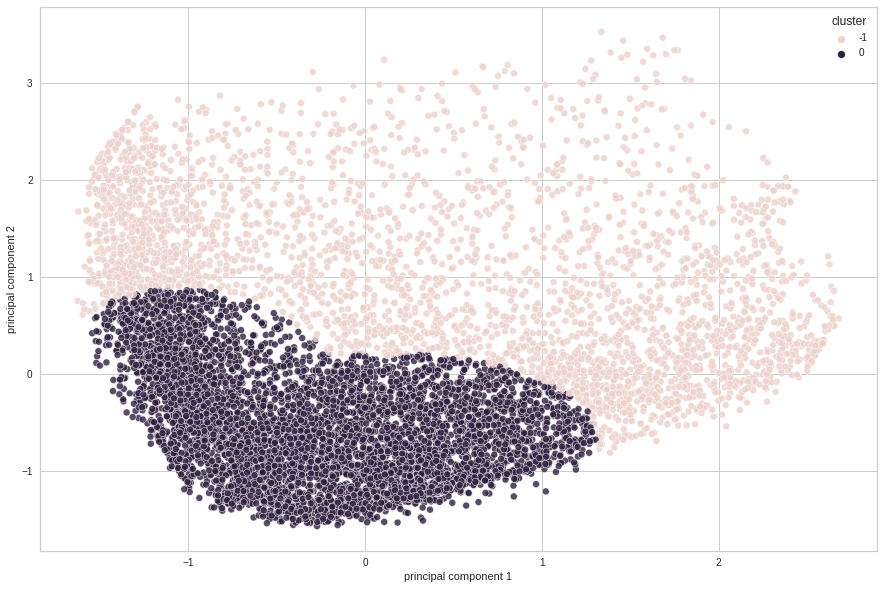

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="principal component 1", y="principal component 2", hue="cluster", data=data_p,alpha=0.8)
plt.title('Agglomerative Hierarchical Clustering with 3 Clusters')
plt.show()